In [2]:
import numpy as np
import lyricsgenius as lg
import pandas as pd
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [3]:
def get_all_songs(list_of_artists):
    genius = lg.Genius(access_token, 
                   verbose = False, 
                   remove_section_headers = True,
                   skip_non_songs = False,
                   excluded_terms = ["(Remix)", "(Live)","(Remastered)"],
                   timeout = 15)
    
    #empty list to be filled with smaller list about seach song of every artist
    all_artists_list = []
    
    for artist in list_of_artists:
        #create a json file for a particular artist
        json_file = genius.search_artist(artist)
        #save that file on disk with the default name 'Lyrics_{Artist_name}.json'
        json_file.save_lyrics()
        
        #convert json file to dictionary as they are usually easier to manipulate
        with open("".join(('Lyrics_',artist,'.json')), 'r') as JSON:
            artist_dict = json.load(JSON)
        
        #extract the relevant information from the dictionary
        artist_list = artist_dict['songs']
        
        number_of_songs = len(artist_list)
        
        #iterate through the list to get album and song names, date of release and the lyrics
        for i in range(number_of_songs):
        ##some songs have missing album names
            try:
                small_list = [artist, artist_list[i]['album']['name'], artist_list[i]['release_date'], artist_list[i]['title'], artist_list[i]['lyrics']]
            except:
                small_list = [artist, 'Unknown', artist_list[i]['release_date'], artist_list[i]['title'], artist_list[i]['lyrics']]
            all_artists_list.append(small_list)
    
    #convert list to a pandas dataframe
    df = pd.DataFrame(all_artists_list, columns = ['Band', 'Album','Date','Title','Lyrics'])
    #in the lyrics column, next line '\n' text exists. Remove and replace with whitespace
    df.replace({ r'\A\s+|\s+\Z': '', '\n' : ' '}, regex=True, inplace=True)               
    return df

In [4]:
def text_for_each_artist(dataset, list_of_artists):
    lyrics_dict = {}
    for artist in list_of_artists:
        lyrics_dict[artist] = {}
        lyrics_dict[artist]['Lyrics'] = ''        
        for text in df.loc[df.loc[:,'Band'] == artist, 'Lyrics']:
            lyrics_dict[artist]['Lyrics'] += str(text)
            lyrics_dict[artist]['Lyrics'] += ' '
    return lyrics_dict

In [5]:
def generate_wordcloud(lyrics_dict, list_of_artists):
    for artist in list_of_artists:
        mask = np.array(Image.open(''.join((artist,'_logo.jpg'))))
        wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
        wc.generate(lyrics_dict[artist]['Lyrics'])
        plt.imshow(wc, interpolation="bilinear")
        plt.axis('off')
        plt.show()
        wc.to_file("".join((artist,'_wordcloud.jpg')))

In [6]:
list_of_artists = ['Sepultura', 'Sodom','Megadeth']
access_token = '0Gn2G7j0gJWGMpf3_fYYphHnI0NjOMrbZQpIyAaX9fRtt2uUCMcze8Q9CDcdBxOk'

In [7]:
df = get_all_songs(list_of_artists)

In [14]:
lyrics_dict = text_for_each_artist(df, list_of_artists)

In [15]:
for artist in list_of_artists:
        lyrics_dict[artist]['Lyrics'] = lyrics_dict[artist]['Lyrics'].lower() 

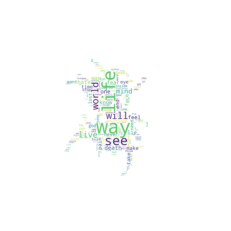

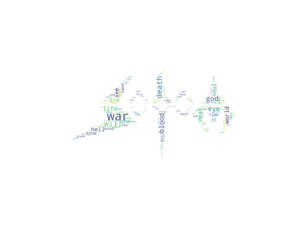

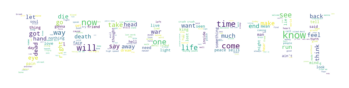

In [16]:
generate_wordcloud(lyrics_dict, list_of_artists)